<a href="https://colab.research.google.com/github/Beatriz-Maria/disciplina_prog/blob/main/Biopython_Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programa em família**
# **Olhos de tigre**
--------------------------

Inicializar o computador do Google.

Instalação do pacote Biopython.

Importar a biblioteca Biopython e os objetos necessários da biblioteca.


In [1]:
!pip3 install biopython #Instalação do pacote
import Bio # Importação da biblioteca
from Bio.Seq import Seq # Importação do objeto Seq
from Bio import SeqIO
import pylab
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 4.3 MB/s 


# **Alinhamento Global**
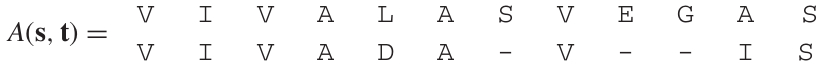

## **Marcando as coincidências das bases**


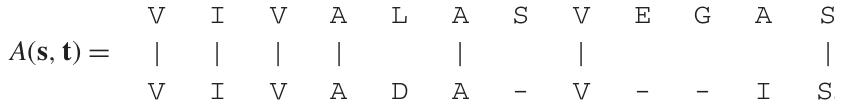

## **Função de scoring**

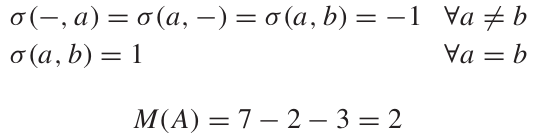

Similarity:  2
Sequence shuffled:  I-AD-VVVS-IA
Similarity:  -10
Max similarity:  2
Min similarity:  -12


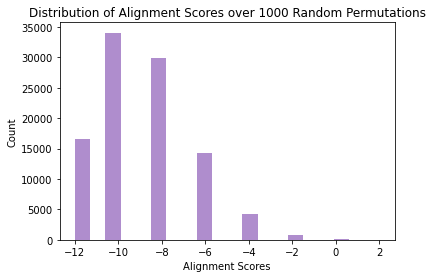

In [41]:
#Comparação das sequências "VIVALASVEGAS" e "VIVADAVIS"
# Por terem tamanhos diferentes o algoritmo insere bases extras "-", pois evolutivamente
# podem ter acontecido substituições (remoções ou inserções).

# Função que calcula a similaridade entre duas sequências
# Se o base/aminoácido for igual na posição soma 1 senão subtrai 1
def calc_similarity(seq1, seq2):
  similarity = 0
  for i in range(len(seq1)):
    if seq1[i] == seq2[i]:
      similarity += 1
    else:
      similarity -= 1
  return similarity


seq1 = "VIVALASVEGAS"
seq2 = "VIVADA-V--IS"
similarity = calc_similarity(seq1, seq2)


print("Similarity: ", similarity)

seq2_list = list(seq2)
random.shuffle(seq2_list)
seq2_shuffled = ''.join([str(item) for item in seq2_list])

print("Sequence shuffled: ", seq2_shuffled)
print("Similarity: ", calc_similarity(seq1, seq2_shuffled))

hist = []
for i in range(100000):   #embaralha mil vezes --> maior número de similaridade foi zero (+6-6)
  seq2_list = list(seq2)
  random.shuffle(seq2_list)
  seq2_shuffled = ''.join([str(item) for item in seq2_list])
  hist.append(calc_similarity(seq1, seq2_shuffled))

print("Max similarity: ", max(hist))
print("Min similarity: ", min(hist))

pylab.hist(hist, bins=20, color='C4', alpha = 0.75 )
pylab.title(
    "Distribution of Alignment Scores over 1000 Random Permutations"
)
pylab.xlabel("Alignment Scores")
pylab.ylabel("Count")
pylab.show()

# Alinhamento global de duas subsequências curtas das proteínas Hox (AAD01939, AAQ67266)#

Similarity:  55  Size:  63
Max similarity:  -33
Min similarity:  -63


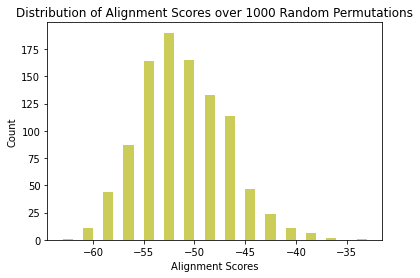

In [48]:
# Alinhamento global de duas subsequências curtas das proteínas Hox (AAD01939,
# AAQ67266)
fly =    'ERKRGRQTYTRYQTLELEKEFHFNRYLTRRRRIEIAHALCLTERQIKIWFQNRRMKWKKENKT'
human =  'DRKRGRQTYTRYQTLELEKEFHFNRYLTRRRRIEIAHALCLTERQVKIWFQNRRMKWKKEHKD'

print('Similarity: ', calc_similarity(fly, human), " Size: ", len(fly))

hist = []
for i in range(1000):
  seq2_list = list(fly)
  random.shuffle(seq2_list)
  seq2_shuffled = ''.join([str(item) for item in seq2_list])
  hist.append(calc_similarity(human, seq2_shuffled))

print("Max similarity: ", max(hist))
print("Min similarity: ", min(hist))

pylab.hist(hist, bins=30, color='C8', alpha= 0.75)
pylab.title(
    "Distribution of Alignment Scores over 1000 Random Permutations"
)
pylab.xlabel("Alignment Scores")
pylab.ylabel("Count")
pylab.show()

# **Alinhamento Local**
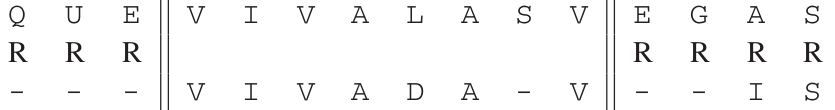


# **Alinhamento Local**

Seq1:  QUEVIVALASVEGAS  Size Seq:  15
Seq2:  VIVADA-V--IS  Size Seq:  12
Sub Seq1:  VIVALASVE Size Seq1:  9
Sub Seq2:  VIVADA-V- Size Seq2:  9
Similarity:  3
Max similarity:  1
Min similarity:  -9
Hist:  [-5, -3, -7, -5, -7, -5, -7, -5, -7, -9, -5, -5, -7, -9, -7, -7, -7, -5, -9, -3, -3, -7, -7, -7, -9, -9, -9, -3, -5, -7, -9, -9, -5, -5, -5, -7, 1, -9, -5, -3, -7, -7, -9, -7, -5, -9, -9, -5, -3, -7, -5, -9, -7, -5, -7, -7, -9, -3, -5, -5, -9, -7, -7, -7, -5, -5, -7, -3, -5, -3, -9, -7, -7, -5, -7, -5, -7, -7, -5, -9, -7, -5, -5, -9, -9, -5, -5, -5, -7, -5, -1, -5, -9, -7, -5, -7, -7, -7, -5, -5, -7, -9, -3, -7, -7, -7, -5, -5, -5, -7, -3, -5, -7, -5, -5, -5, -7, -7, -7, -5, -5, -9, -3, -7, -3, -3, -7, -5, -3, -3, -5, -5, -7, -5, -9, -9, -5, -3, -5, -7, -5, -7, -3, -5, -3, -7, -5, -3, -7, -5, -7, -1, -9, -5, -7, -7, -7, -7, -9, -7, -3, -3, -7, -7, -7, -5, -5, -9, -3, -5, -5, -5, -7, -3, -1, -5, -5, -7, -7, -5, -7, -1, -5, -5, -5, -5, -9, -5, -7, -5, -5, -7, -9, -1, -5, -7, -5, -7, -5, 

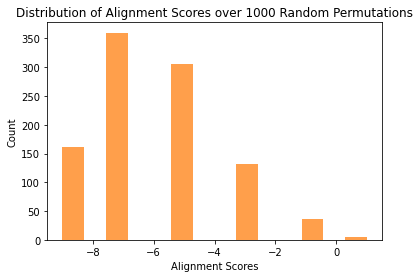

In [54]:
seq1 = "QUEVIVALASVEGAS"
seq2 = "VIVADA-V--IS"

print('Seq1: ', seq1, ' Size Seq: ', len(seq1))
print('Seq2: ', seq2, ' Size Seq: ', len(seq2))

print('Sub Seq1: ', seq1[3:12], 'Size Seq1: ', len(seq1[3:12]) ) #testar trocar o doze por 11 e trocar 9 por 8 para dar o mesmo tamanho
print('Sub Seq2: ', seq2[:9], 'Size Seq2: ', len(seq2[:9]) )

similarity = calc_similarity(seq1[3:12], seq2[:9]) #testar trocar o doze por 11 e trocar 9 por 8 para dar o mesmo tamanho

print("Similarity: ", similarity)

hist = []
for i in range(1000):
  seq2_list = list(seq2[:9])
  random.shuffle(seq2_list)
  seq2_shuffled = ''.join([str(item) for item in seq2_list])
  hist.append(calc_similarity(seq1[3:12], seq2_shuffled))

print("Max similarity: ", max(hist))
print("Min similarity: ", min(hist))
print("Hist: ", hist)
pylab.hist(hist, bins=14, color = 'C1', alpha=0.75)
pylab.title(
    "Distribution of Alignment Scores over 1000 Random Permutations"
)
pylab.xlabel("Alignment Scores")
pylab.ylabel("Count")
pylab.show()

#Exemplo de alinhamento de proteínas



Similarity:  117
Max similarity:  -97   tamanhO;  133
Min similarity:  -129


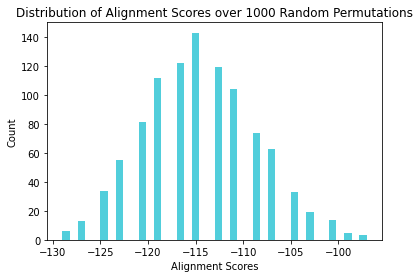

local:  GGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ


In [59]:
fly =   'HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ'

human = 'HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ'

print('Similarity: ', calc_similarity(fly, human))

hist = []
for i in range(1000):
  seq2_list = list(fly)
  random.shuffle(seq2_list)
  seq2_shuffled = ''.join([str(item) for item in seq2_list])
  hist.append(calc_similarity(human, seq2_shuffled))

print("Max similarity: ", max(hist), "  tamanhO; ", len(fly))
print("Min similarity: ", min(hist))

pylab.hist(hist, bins=40, color='C9', alpha=0.75)
pylab.title(
    "Distribution of Alignment Scores over 1000 Random Permutations"
)
pylab.xlabel("Alignment Scores")
pylab.ylabel("Count")
pylab.show()

fly_local = fly[-66:]
print("local: ", fly_local)


# outra forma de realizar o teste de validade estatística seria, a partir de uma tabela com os AA, gerar uma sequ-ência de maneira randomizada e compará-la com a sequência de análise